In [1]:
from pandas import DataFrame
from numpy import sqrt
import numpy as np

In [2]:
from root_pandas import read_root, to_root

Welcome to JupyROOT 6.18/04


In [3]:
prefix = "/ceph/users/qfuehring/"
data = read_root( [prefix + i for i in ["B2HHH_MagnetDown.root"]] )

In [4]:
class lorentz_vector:
    def __init__(self,E,P1,P2,P3):
        self.e  = E
        self.p1 = P1
        self.p2 = P2
        self.p3 = P3
        self.m  = (self*self)**0.5
        self.p  = (self.p1**2 + self.p2**2 + self.p3**2)**0.5
    def __str__(self):
        return f"({self.e},{self.p1},{self.p2},{self.p3})"
    def __repr__(self):
        return f"({self.e},{self.p1},{self.p2},{self.p3})"
    def __mul__(self, other):
        E_g  = self.e  * other.e
        P1_g = self.p1 * other.p1
        P2_g = self.p2 * other.p2
        P3_g = self.p3 * other.p3
        return E_g - (P1_g+P2_g+P3_g)
    def __add__(self, other):
        E_g  = self.e  + other.e
        P1_g = self.p1 + other.p1
        P2_g = self.p2 + other.p2
        P3_g = self.p3 + other.p3
        return lorentz_vector(E_g,P1_g,P2_g,P3_g)
    def __sub__(self, other):
        E_g  = self.e  - other.e
        P1_g = self.p1 - other.p1
        P2_g = self.p2 - other.p2
        P3_g = self.p3 - other.p3
        return lorentz_vector(E_g,P1_g,P2_g,P3_g)

In [5]:
def energy(m,p1,p2,p3):
    return (m**2 + (p1**2 + p2**2 + p3**2))**0.5

In [6]:
M_K = 493.677

In [7]:
p1 = lorentz_vector( energy(M_K,data["H1_PX"],data["H1_PY"],data["H1_PZ"]) ,data["H1_PX"],data["H1_PY"],data["H1_PZ"] )
p2 = lorentz_vector( energy(M_K,data["H2_PX"],data["H2_PY"],data["H2_PZ"]) ,data["H2_PX"],data["H2_PY"],data["H2_PZ"] )
p3 = lorentz_vector( energy(M_K,data["H3_PX"],data["H3_PY"],data["H3_PZ"]) ,data["H3_PX"],data["H3_PY"],data["H3_PZ"] )

In [8]:
p_B = p1+p2+p3

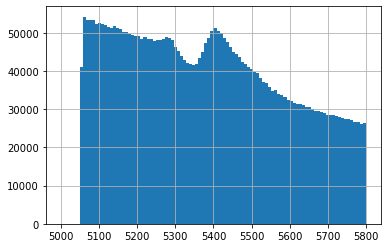

In [9]:
(p_B.m).hist(bins=100,range=(5000,5800))

In [10]:
from particle import Particle

In [11]:
Bmeson = Particle.from_pdgid(511)

In [12]:
data["B_M"] = p_B.m

Text(0.5, 0, 'm($B^{0}$)')

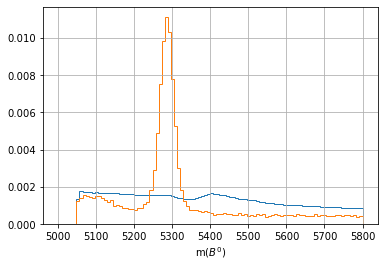

In [13]:
import matplotlib.pyplot as plt
cut = "H1_ProbK>0.3 & H2_ProbK>0.3 & H3_ProbK>0.3"
data["B_M"].hist(bins=100,range=(5000,5800),density=True,histtype="step")
data.query(cut)["B_M"].hist(bins=100,range=(5000,5800),density=True,histtype="step")
plt.xlabel(r'm(${0}$)'.format(Bmeson.latex_name))

In [14]:
pPhi = p1 + p2